In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'D:\\data.xlsx - Sheet1.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5* IQR
    return (data < lower_bound) | (data > upper_bound), data[(data < lower_bound) | (data > upper_bound)]

In [6]:
detect_outliers_iqr(data['Salary'])

(0       False
 1       False
 2       False
 3        True
 4       False
         ...  
 3993    False
 3994    False
 3995    False
 3996    False
 3997    False
 Name: Salary, Length: 3998, dtype: bool,
 3       1100000.0
 76       800000.0
 92      1500000.0
 123     1200000.0
 128      675000.0
           ...    
 3823     775000.0
 3904     850000.0
 3912     730000.0
 3961     700000.0
 3992     800000.0
 Name: Salary, Length: 109, dtype: float64)

In [7]:
outliers_mask, outliers_values = detect_outliers_iqr(data['Salary'])
# Display the indices of outliers
print("Indices of outliers:")
print(data[outliers_mask].index)
# Display the outliers themselves
print("Values of outliers:")
print(outliers_values)

Indices of outliers:
Index([   3,   76,   92,  123,  128,  166,  177,  296,  328,  331,
       ...
       3607, 3652, 3675, 3710, 3733, 3823, 3904, 3912, 3961, 3992],
      dtype='int64', length=109)
Values of outliers:
3       1100000.0
76       800000.0
92      1500000.0
123     1200000.0
128      675000.0
          ...    
3823     775000.0
3904     850000.0
3912     730000.0
3961     700000.0
3992     800000.0
Name: Salary, Length: 109, dtype: float64


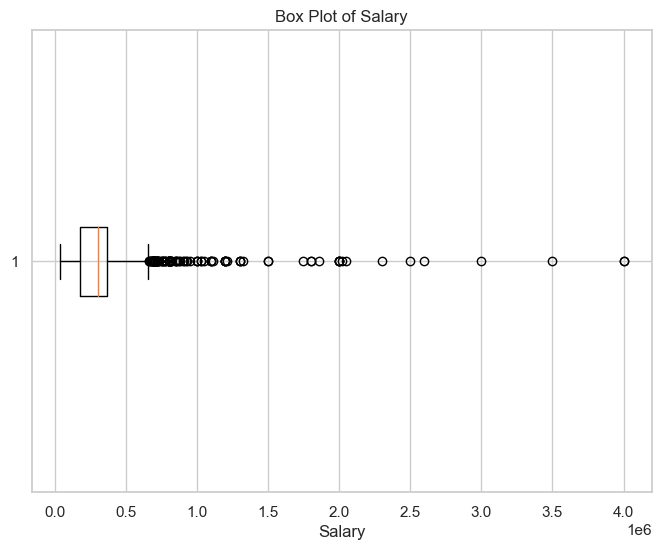

In [68]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Filter out NaN values from the 'Salary' column
salary_data = data['Salary'].dropna()

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(salary_data, vert=False)
plt.xlabel('Salary')
plt.title('Box Plot of Salary')
plt.show()

In [56]:
# Assuming your DataFrame is named 'df'

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data, k=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return (data < lower_bound) | (data > upper_bound)

# Use the function to detect outliers in the 'Salary' column
outliers_mask = detect_outliers_iqr(data['Salary'])

# Remove rows containing outliers
df_cleaned = data[~outliers_mask]

# Now df_cleaned contains the DataFrame with outliers removed


In [57]:
df_cleaned

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bengaluru,f,1990,84.30,"board ofsecondary education,ap",...,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1970,17,20
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989,85.40,cbse,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,18,19
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.00,cbse,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
4,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.00,cbse,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21
5,1027655,300000.0,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992,89.92,state board,...,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,10,1970,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987,52.09,cbse,...,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,1,1970,19,17
3994,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992,90.00,state board,...,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,1970,17,22
3995,355888,320000.0,2013-07-01,2024-02-23,associate software engineer,Bengaluru,m,1991,81.86,"bse,odisha",...,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,11,1970,17,21
3996,947111,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992,78.72,state board,...,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1,1970,18,22


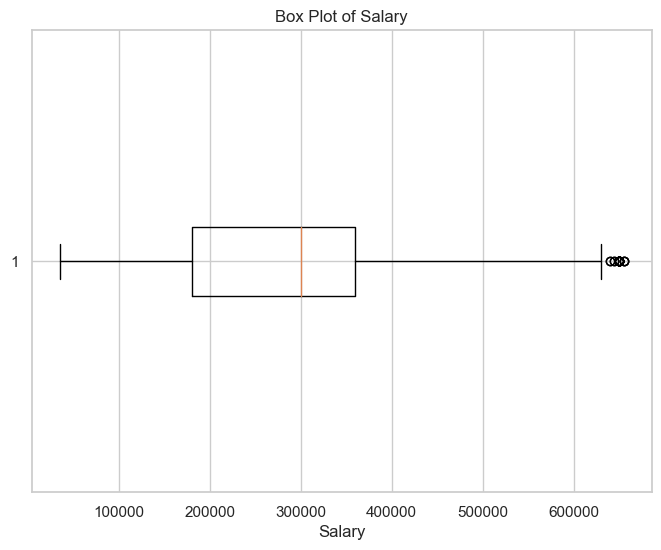

In [58]:
salary_data = df_cleaned['Salary'].dropna()

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(salary_data, vert=False)
plt.xlabel('Salary')
plt.title('Box Plot of Salary')
plt.show()

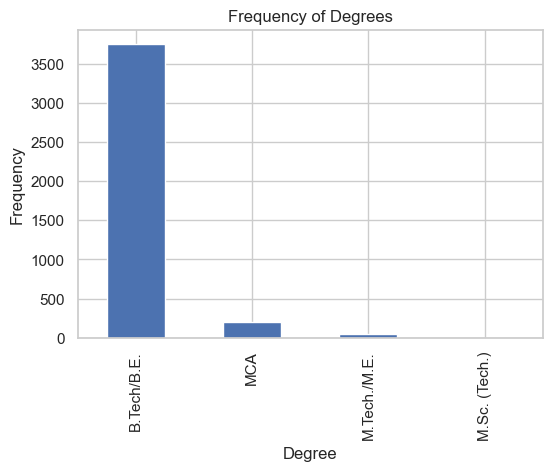

In [59]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
degree_counts = data['Degree'].value_counts()
plt.figure(figsize=(6,4))
degree_counts.plot(kind='bar')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Frequency of Degrees')
plt.xticks()
plt.show()

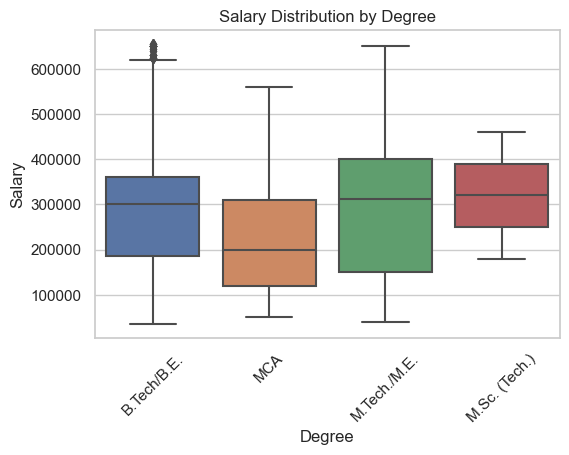

In [60]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='Degree', y='Salary',data=df_cleaned)
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Salary Distribution by Degree')
plt.xticks(rotation=45)
plt.show()

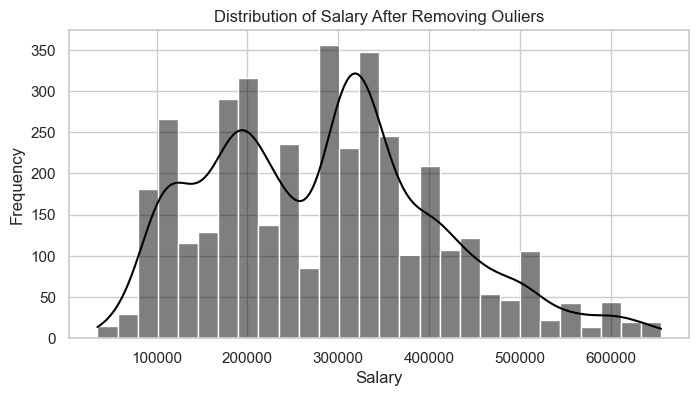

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Remove NaN values from the 'Salary' column
salary_data = df_cleaned['Salary'].dropna()

# Create a distribution plot
plt.figure(figsize=(8,4))
sns.histplot(salary_data, kde=True,color='black')  # kde=True adds a kernel density estimation curve
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary After Removing Ouliers')
plt.show()


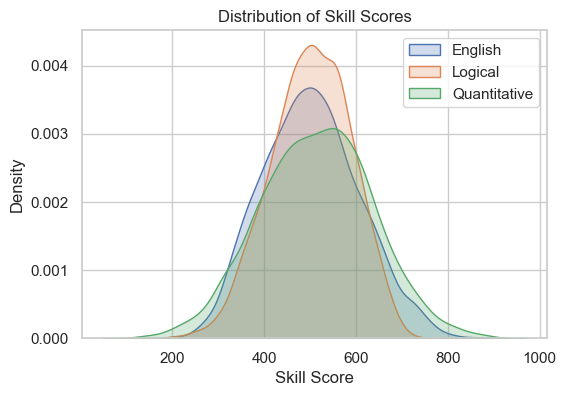

In [62]:
plt.figure(figsize=(6,4))
sns.kdeplot(data['English'], label='English', shade=True)
sns.kdeplot(data['Logical'], label='Logical', shade=True)
sns.kdeplot(data['Quant'], label='Quantitative', shade=True)
plt.xlabel('Skill Score')
plt.ylabel('Density')
plt.title('Distribution of Skill Scores')
plt.legend()
plt.show()


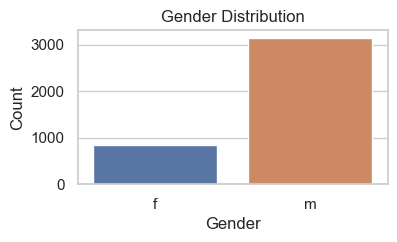

In [63]:
# Gender distribution
plt.figure(figsize=(4,2))
sns.countplot(x='Gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [64]:
import datetime as dt
data["DOJ"]=pd.to_datetime(data["DOJ"]).dt.date
data["DOL"].replace("present",dt.datetime.today(),inplace=True)
data['DOL'] = pd.to_datetime(data['DOL']).dt.date
## We will engineer this feature from DOJ and DOL as we are only concerned with␣how many years the person has worked
## in the organization.
data['Experience'] = pd.to_datetime(data["DOL"]).dt.year - pd.to_datetime(data['DOJ']).dt.year
##We only need DOB year,so we will convert DOB column from timestamp to year
data['DOB'] = pd.to_datetime(data['DOB']).dt.year
data.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bengaluru,f,1970,84.3,"board ofsecondary education,ap",...,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1970,17,20
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1970,85.4,cbse,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,18,19
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1970,85.0,cbse,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1970,85.6,cbse,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1970,18,19
4,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1970,78.0,cbse,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21


In [65]:
##We also know graduation year contains 0 value,we need to impute it with mode␣before engineering new feature from this.
## we are using dataset.GraduationYear.mode()[0] as it return a series unlike␣df.mean/mode
data['GraduationYear'].replace(0,data.GraduationYear.mode()[0],inplace=True)
data['GraduationYear']=pd.to_datetime(data['GraduationYear'])
data['Grad_year']=data['GraduationYear'].dt.year
### New columns which can used to the know
data['12GradAge']=abs(data['12graduation']-data['DOB'])
data['GradAge']=abs(data['Grad_year']-data['DOB'])
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bengaluru,f,1970,84.3,"board ofsecondary education,ap",...,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1970,37,0
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1970,85.4,cbse,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,37,0
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1970,85.0,cbse,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,40,0
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1970,85.6,cbse,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1970,37,0
4,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1970,78.0,cbse,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,38,0


In [ ]:
#For mechanical domain
data.loc[data['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get',mech,inplace=True)
#for EEE domain,as all previous get's will be replaced,we can replace the remaining directly without conditions
data['Designation'].replace('get',eee,inplace=True)

In [20]:


# Replace '-1' (as a string) with 'unknown' in the 'JobCity' column
data['JobCity'].replace('-1', 'unknown', inplace=True)
# Apply the title() method to make the data case insensitive
data['JobCity'] = data['JobCity'].apply(lambda x: x.title())

In [21]:
import pandas as pd
def clean_job_city(data):
# Replace various misspellings and variations of city names
    data["JobCity"].replace({
        "Bangalore": "Bengaluru",
        "Banaglore": "Bengaluru",
        "Chennai, Bangalore": "Bengaluru",
        " Bangalore": "Bengaluru",
        "Bangalore ": "Bengaluru",
        "Banglore": "Bengaluru",
        "Jaipur ": "Jaipur",
        "Gandhinagar": "Gandhi Nagar",
        "Hyderabad ": "Hyderabad",
        "Hyderabad(Bhadurpally)": "Hyderabad",
        "Bhubaneswar ": "Bhubaneswar",
        "Delhi/Ncr": "Delhi",
        "Nagpur ": "Nagpur",
        "Pune ": "Pune",
        "Trivandrum ": "Trivandrum",
        "Thiruvananthapuram": "Trivandrum"
    }, inplace=True)
    return data
clean_job_city(data).head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
0,train,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bengaluru,f,1990,84.3,...,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1970,17,20
1,train,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989,85.4,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,18,19
2,train,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.0,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
3,train,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.6,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1970,18,19
4,train,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.0,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21


In [22]:
data["JobCity"].mode()

0    Bengaluru
Name: JobCity, dtype: object

In [23]:
data["JobCity"].replace("unknown",'Bengaluru',inplace=True)

In [24]:
# Get the mode for each column separately
mode_values = {}
for column in ["Designation","12GradAge","GradAge","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]:

    mode_values[column] = data[data["10board"] == '0'][column].mode()[0]
# Replace '0' values with the mode in each column
for column, mode_value in mode_values.items():
    data.loc[data["10board"] == '0', column] = mode_value
# Now, you can print the mode values for each colum
print("Mode values after replacement:")
print(mode_values)

Mode values after replacement:
{'Designation': 'software engineer', '12GradAge': 18, 'GradAge': 19, 'JobCity': 'Bengaluru', 'Gender': 'm', '10percentage': 75.0, '10board': '0', '12percentage': 65.0, '12board': '0', 'Degree': 'B.Tech/B.E.', 'Specialization': 'computer engineering', 'CollegeState': 'Tamil Nadu'}


In [25]:
data['10board'].mode()

0    cbse
Name: 10board, dtype: object

In [26]:
data['10board'].replace(0,'cbse',inplace=True)

In [27]:
data['12board'].mode()


0    cbse
Name: 12board, dtype: object

In [28]:
data['12board'].replace(0,'cbse',inplace=True)

In [29]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
'computer science & engineering' : 'CS',
'information technology' : 'CS' ,
'computer engineering' : 'CS',
'computer application' : 'CS',
'mechanical engineering' : 'ME',
'electronics and electrical engineering' : 'EC',
'electronics & telecommunications' : 'EC',
'electrical engineering' : 'EL',
'electronics & instrumentation eng' : 'EC',
'civil engineering' : 'CE',
'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
'instrumentation and control engineering' : 'EC',
'electronics engineering' : 'EC',
'biotechnology' : 'other',
'other' : 'other',
'industrial & production engineering' : 'other',
'chemical engineering' : 'other',
'applied electronics and instrumentation' : 'EC',
'computer science and technology' : 'CS',
'telecommunication engineering' : 'EC',
'mechanical and automation' : 'ME',
'automobile/automotive engineering' : 'ME',
'instrumentation engineering' : 'EC',
'mechatronics' : 'ME',
'electronics and computer engineering' : 'CS',
'aeronautical engineering' : 'ME',
'computer science' : 'CS',
'metallurgical engineering' : 'other',
'biomedical engineering' : 'other',
'industrial engineering' : 'other',
'information & communication technology' : 'EC',
'electrical and power engineering' : 'EL',
'industrial & management engineering' : 'other',
'computer networking' : 'CS',
'embedded systems technology' : 'EC',
'power systems and automation' : 'EL',
'computer and communication engineering' : 'CS',
'information science' : 'CS',
'internal combustion engine' : 'ME',
'ceramic engineering' : 'other',
'mechanical & production engineering' : 'ME',
'control and instrumentation engineering' : 'EC',
'polymer technology' : 'other',
'electronics' : 'EC'}
data['Specialization'] = data['Specialization'].map(specialization_map)
data['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

In [30]:
data.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)
data.columns


Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Experience', 'Grad_year',
       '12GradAge', 'GradAge'],
      dtype='object')

In [31]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Experience', 'Grad_year', '12GradAge',
       'GradAge'],
      dtype='object')

In [32]:
data

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bengaluru,f,1990,84.30,"board ofsecondary education,ap",...,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1970,17,20
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989,85.40,cbse,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,18,19
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.00,cbse,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.60,cbse,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1970,18,19
4,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.00,cbse,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987,52.09,cbse,...,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,1,1970,19,17
3994,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992,90.00,state board,...,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,1970,17,22
3995,355888,320000.0,2013-07-01,2024-02-23,associate software engineer,Bengaluru,m,1991,81.86,"bse,odisha",...,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,11,1970,17,21
3996,947111,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992,78.72,state board,...,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1,1970,18,22


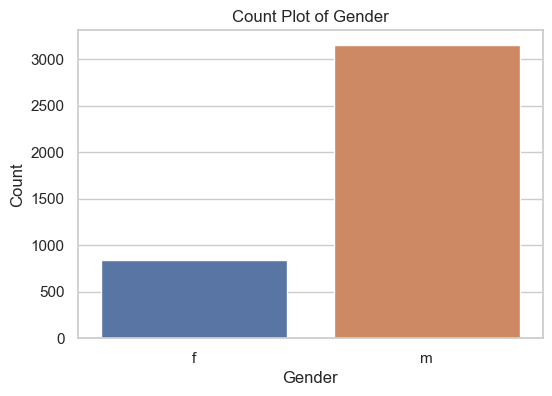

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

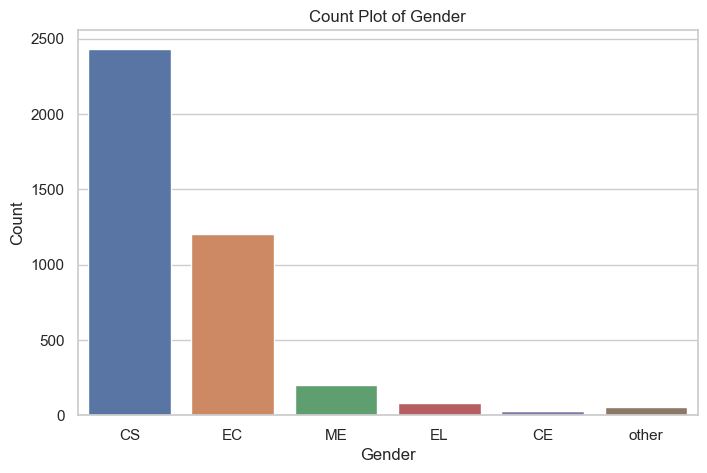

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Specialization', data=data)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

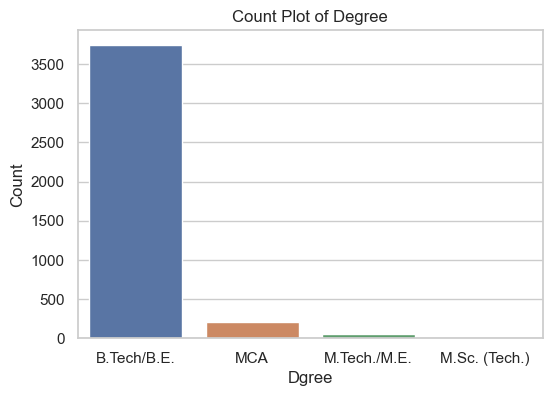

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Degree', data=data)
plt.title('Count Plot of Degree')
plt.xlabel('Dgree')
plt.ylabel('Count')
plt.show()

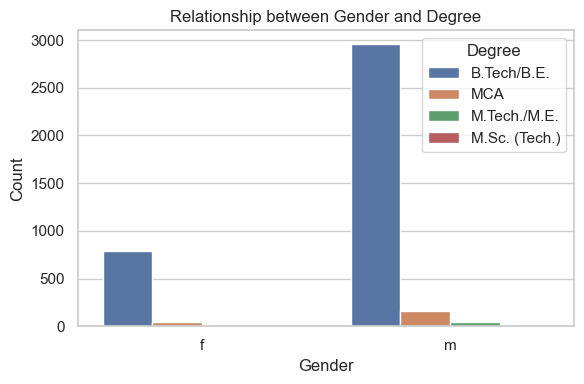

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender', hue='Degree')
plt.title('Relationship between Gender and Degree')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Degree')
# Show plot
plt.tight_layout()
plt.show()

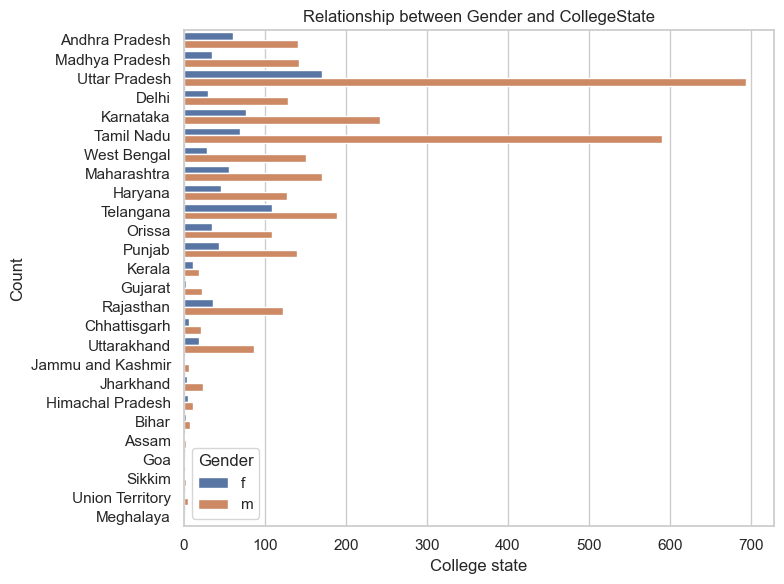

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, y='CollegeState', hue='Gender')
plt.title('Relationship between Gender and CollegeState')
plt.xlabel('College state')
plt.ylabel('Count')
plt.legend(title='Gender')
# Show plot
plt.xticks()
plt.tight_layout()
plt.show()

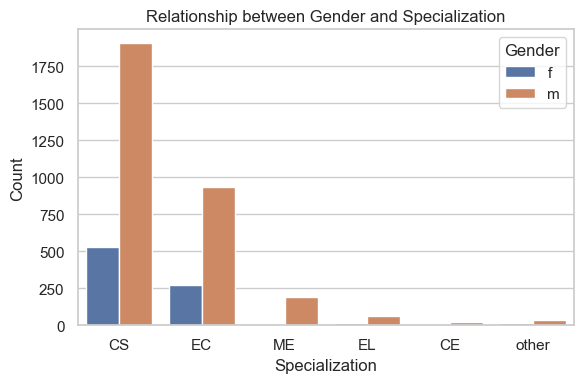

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Specialization', hue='Gender')
plt.title('Relationship between Gender and Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.legend(title='Gender')
# Show plot
plt.xticks()
plt.tight_layout()
plt.show()

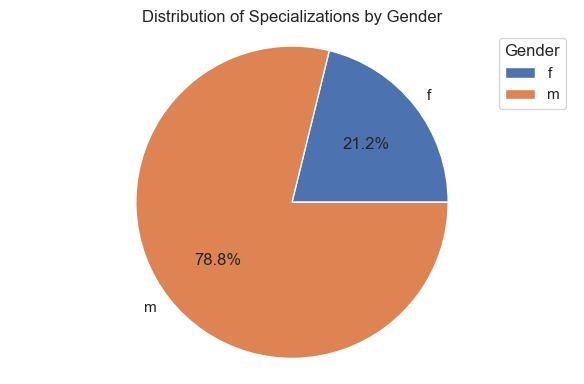

In [39]:
# Calculate count of each specialization by gender
specialization_counts = data.groupby(['Specialization', 'Gender']).size().unstack()
# Plot pie chart
plt.figure(figsize=(6,4))
plt.pie(specialization_counts.sum(), labels=specialization_counts.columns, autopct='%1.1f%%')
plt.title('Distribution of Specializations by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [40]:
popular_Designation = data['Designation'].value_counts()[:5].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer']


In [41]:
top_Designations = data[data['Designation'].isin(popular_Designation)]
print(f"Unique professions : {len(data['Designation'].unique())}")
top_Designations.head()

Unique professions : 401


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.00,cbse,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
4,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.00,cbse,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21
5,1027655,300000.0,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992,89.92,state board,...,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,10,1970,18,22
19,466888,325000.0,2014-09-01,2024-02-23,software engineer,Pune,f,1990,79.00,cbse,...,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,10,1970,18,20
20,140069,320000.0,2010-11-01,2012-09-01,software engineer,Bengaluru,f,1988,91.20,karnataka secondary school of examination,...,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,2,1970,18,18


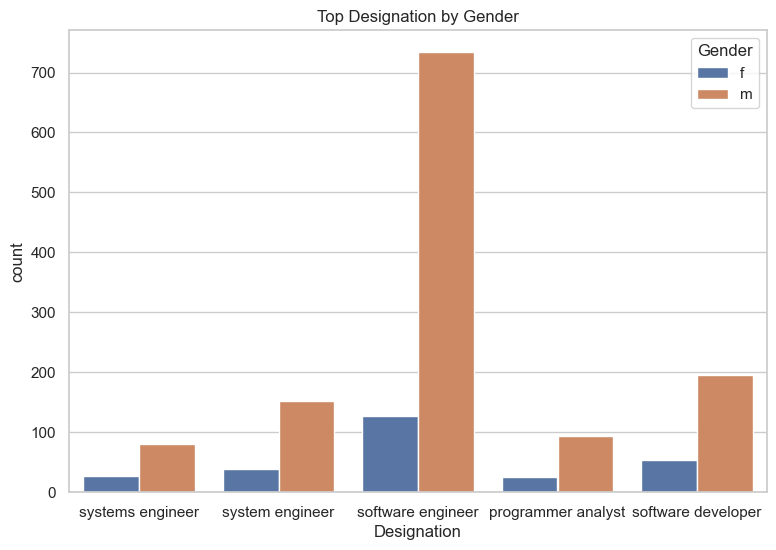

In [42]:
plt.figure(figsize=(9,6))
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks()
plt.yticks()
plt.title("Top Designation by Gender")
plt.show()

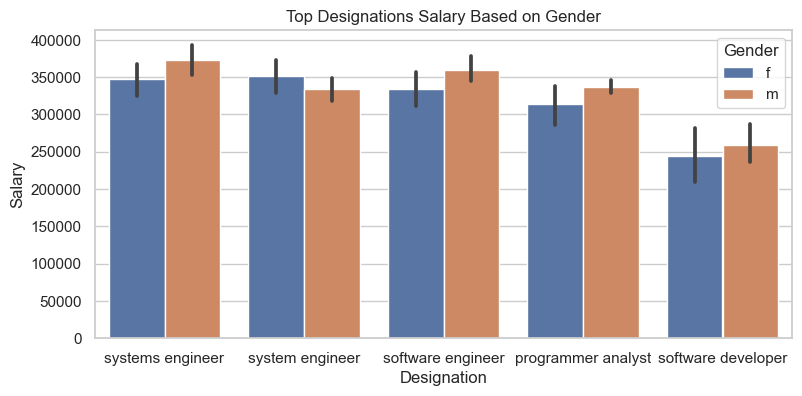

In [43]:
plt.figure(figsize=(9,4))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks()
plt.yticks()
plt.title("Top Designations Salary Based on Gender")
plt.show()

In [44]:
high = list(data.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = data[data['Designation'].isin(high)]
high_pay.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.60,cbse,...,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,13,1970,18,19
6,947847,300000.0,2014-08-01,2015-05-01,java software engineer,Bengaluru,m,1993,86.08,state board,...,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1,1970,17,23
14,1279958,300000.0,2013-07-01,2024-02-23,java software engineer,Bengaluru,m,1992,81.20,state board,...,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,11,1970,16,22
19,466888,325000.0,2014-09-01,2024-02-23,software engineer,Pune,f,1990,79.00,cbse,...,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295,10,1970,18,20
20,140069,320000.0,2010-11-01,2012-09-01,software engineer,Bengaluru,f,1988,91.20,karnataka secondary school of examination,...,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444,2,1970,18,18


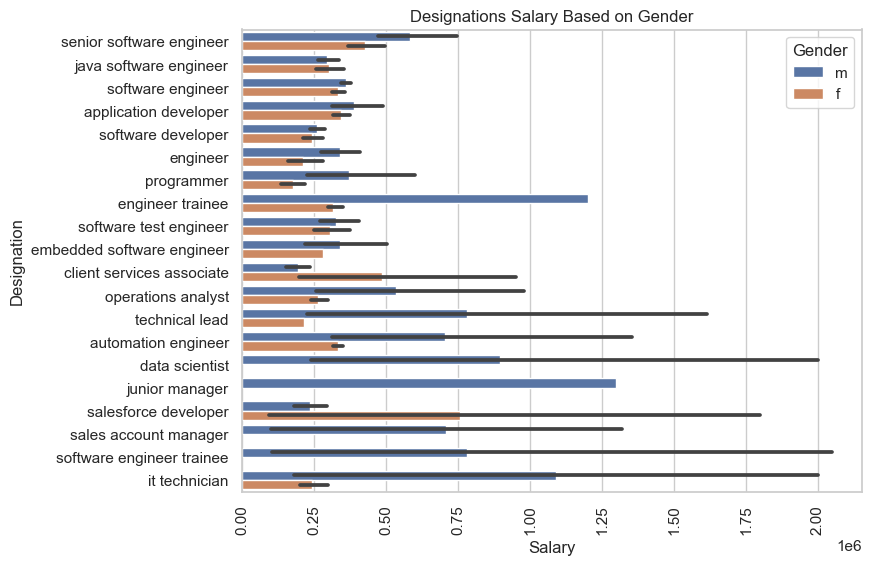

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(y='Designation', x='Salary', hue='Gender', data=high_pay)
plt.xticks(rotation=90)
plt.yticks()
plt.title("Designations Salary Based on Gender")
plt.show()

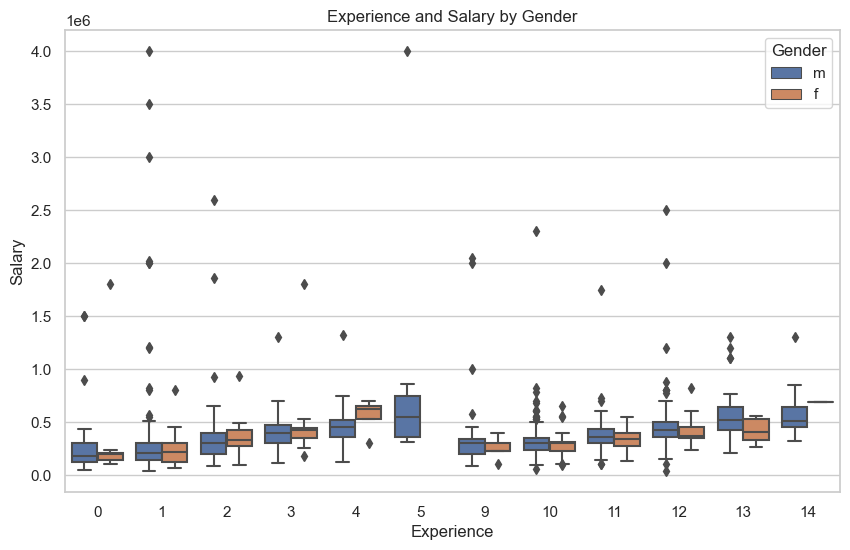

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(data=high_pay,x='Experience',y='Salary',hue='Gender')
plt.title("Experience and Salary by Gender")
plt.show()

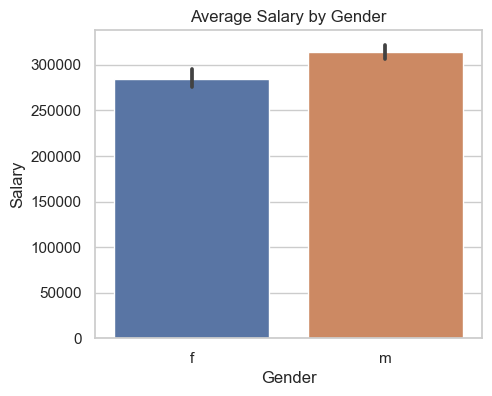

In [47]:
plt.figure(figsize=(5,4))
sns.barplot(data=data, y='Salary', x='Gender')
plt.title('Average Salary by Gender')
plt.show()

In [48]:
data['Experience'].value_counts()

Experience
1     1071
10     875
2      442
11     437
0      319
12     225
3      195
9      165
13     124
4       78
14      46
5       17
18       1
6        1
33       1
17       1
Name: count, dtype: int64

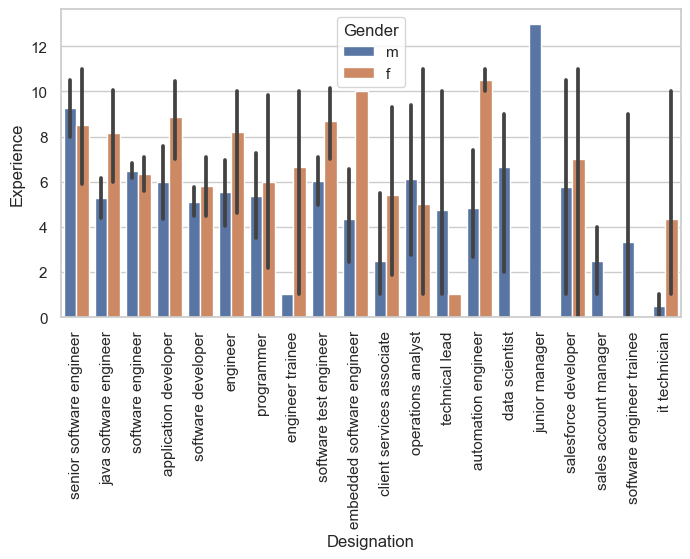

In [49]:
plt.figure(figsize=(8,4))
sns.barplot(data=high_pay,x='Designation',y='Experience',hue='Gender')
plt.xticks(rotation=90)
plt.show()

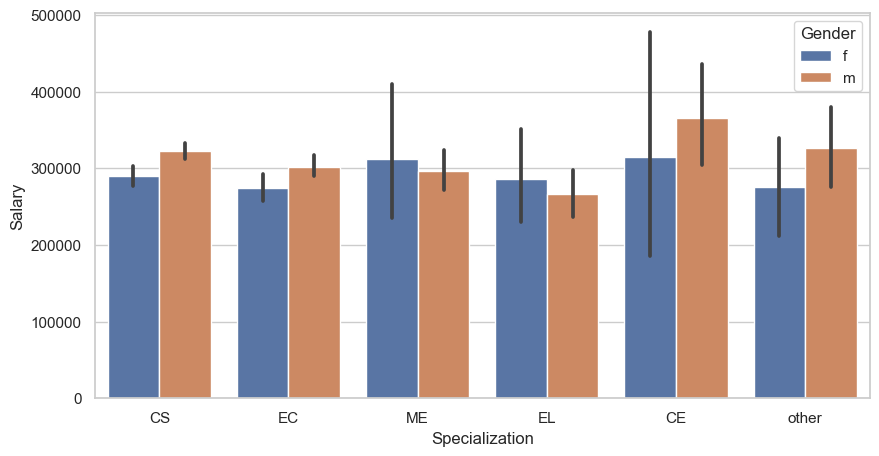

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Specialization',y='Salary',hue='Gender')
plt.show()

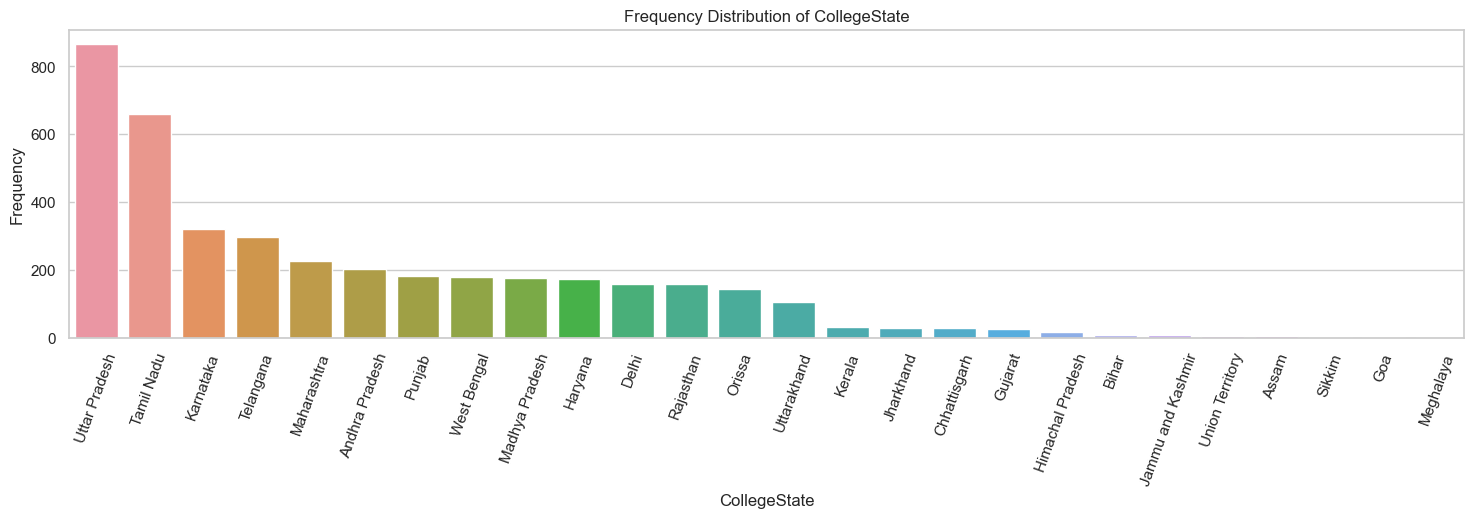

In [51]:
fig, ax = plt.subplots(figsize=(18, 4))
# Create count plot
sns.countplot(data=data, x='CollegeState', order=data['CollegeState'].value_counts().index, ax=ax)
ax.set_title('Frequency Distribution of CollegeState')
ax.set_xlabel('CollegeState')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x',rotation=70)
plt.show()

<Axes: xlabel='Designation', ylabel='Salary'>

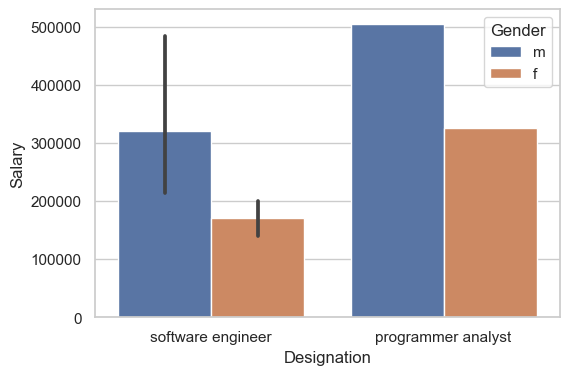

In [52]:
new=data[(data["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (data['Experience']==0)]
plt.figure(figsize=(6,4))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new)

In [53]:
from scipy.stats import chi2_contingency
# Create a contingency table for Gender vs. Specialization
gender_specialization_contingency = pd.crosstab(data['Gender'], data['Salary'])
# Perform chi-square test to determine if there is a significant relationship between gender and specialization
chi2_stat, p_val, dof, ex = chi2_contingency(gender_specialization_contingency)
# Determine the significance level
alpha = 0.05
# Interpret the p-value
if p_val < alpha:
    relationship_result = "There is a significant relationship between gender and specialization."
else:
    relationship_result = "There is no significant relationship between gender and specialization."
print("Result of Chi-square Test for Gender vs. Specialization:")
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Result:", relationship_result)

Result of Chi-square Test for Gender vs. Specialization:
Chi-square Statistic: 195.7383501421794
p-value: 0.14678119850079202
Result: There is no significant relationship between gender and specialization.
